<a href="https://colab.research.google.com/github/BossDevinator/IS_4487/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email


PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/Labs/DataSets/superstore_retail_orders.csv')

In [3]:
df.columns

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'email', 'order_type', 'quantity', 'product_name',
       'product_line', 'product_price', 'product_status'],
      dtype='object')

In [4]:
df.describe()

,order_id,quantity,product_price
count,56043.000000,56004.000000,56043.000000
mean,61668.410578,3.348582,6198.309433
std,7508.142486,422.654112,35784.965255
min,45079.000000,1.000000,2.290000
25%,55644.500000,1.000000,7.950000
50%,61870.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [5]:
df.shape

(56043, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56043 entries, 0 to 56042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56043 non-null  int64  
 1   order_date        56011 non-null  object 
 2   order_year_month  56011 non-null  object 
 3   customer_name     56043 non-null  object 
 4   city              55569 non-null  object 
 5   state_province    55569 non-null  object 
 6   email             56043 non-null  object 
 7   order_type        56043 non-null  object 
 8   quantity          56004 non-null  float64
 9   product_name      56043 non-null  object 
 10  product_line      56043 non-null  object 
 11  product_price     56043 non-null  float64
 12  product_status    56043 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 5.6+ MB


In [7]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [8]:
df.dtypes

,0
order_id,int64
order_date,object
order_year_month,object
customer_name,object
city,object
state_province,object
email,object
order_type,object
quantity,float64
product_name,object


In [9]:
df['quantity'] = df['quantity'].fillna(0).astype(int)

df['quantity'].head()

,quantity
0,3
1,4
2,5
3,1
4,1


In [10]:
for col in ['order_type', 'product_line', 'product_status']:
  df[col] = pd.Categorical(df[col])

df.dtypes

,0
order_id,int64
order_date,object
order_year_month,object
customer_name,object
city,object
state_province,object
email,object
order_type,category
quantity,int64
product_name,object


In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55537 entries, 0 to 56042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   order_id          55537 non-null  int64   
 1   order_date        55537 non-null  object  
 2   order_year_month  55537 non-null  object  
 3   customer_name     55537 non-null  object  
 4   city              55537 non-null  object  
 5   state_province    55537 non-null  object  
 6   email             55537 non-null  object  
 7   order_type        55537 non-null  category
 8   quantity          55537 non-null  int64   
 9   product_name      55537 non-null  object  
 10  product_line      55537 non-null  category
 11  product_price     55537 non-null  float64 
 12  product_status    55537 non-null  category
dtypes: category(3), float64(1), int64(2), object(7)
memory usage: 4.8+ MB


In [12]:
df['total_amount'] = df['product_price'] * df['quantity']
df.head()

<ipython-input-12-453379f97813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amount'] = df['product_price'] * df['quantity']


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,total_amount
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,1949.97
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2599.96
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,3249.95
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99


In [13]:
possible_q_outliers = df[df['quantity'] > 5000]

possible_q_outliers

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,total_amount
33822,66829,2024-03-25,2024-03,Destiny Smith,New Hannahborough,Indiana,destiny_smith@email.com,Online,100000,Water Bottle - 30 oz.,Accessories,4.99,Active,499000.0


In [14]:
possible_ta_outliers = df[df['total_amount'] > 200000].sort_values('total_amount', ascending=False)

possible_ta_outliers

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,total_amount
44626,45087,2022-01-03,2022-01,Joseph Martin,Rogersborough,Nevada,joseph_martin@email.com,Retail,600,"Projector Black, 44",Projector,3374.99,Active,2024994.0
55308,66470,2024-03-19,2024-03,Lisa Wang,Baileychester,South Dakota,lisa_wang@email.com,Retail,2000,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,Active,1829240.0
45857,45085,2022-01-02,2022-01,Reginald Alvarez,Lake Kellyland,Washington,reginald_alvarez@email.com,Retail,500,Gaming Laptop Silver,Laptop,3578.27,Active,1789135.0
36971,52317,2023-08-09,2023-08,Cara Zhou,Ricestad,Texas,cara_zhou@email.com,Online,3,"Half-Finger Gloves, M",Clothing,235481.00,Not Active,706443.0
37064,56601,2023-10-24,2023-10,Luis Li,New David,Minnesota,luis_li@email.com,Online,3,"Half-Finger Gloves, M",Clothing,235481.00,Not Active,706443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36885,70888,2024-05-19,2024-05,Jeremy Bryant,Mcconnellburgh,Illinois,jeremy_bryant@email.com,Retail,1,"Half-Finger Gloves, L",Clothing,235481.00,Not Active,235481.0
37107,58723,2023-11-28,2023-11,Christian Chen,Hartmanmouth,California,christian_chen@email.com,Online,1,"Half-Finger Gloves, M",Clothing,235481.00,Not Active,235481.0
36567,52632,2023-08-16,2023-08,Fernando Lewis,Aguilarfort,Minnesota,fernando_lewis@email.com,Retail,1,"Half-Finger Gloves, L",Clothing,235481.00,Not Active,235481.0
37395,72489,2024-06-08,2024-06,Jorge Sun,Jeremyhaven,New Hampshire,jorge_sun@email.com,Online,1,"Half-Finger Gloves, M",Clothing,235481.00,Not Active,235481.0


In [15]:
df = df.drop(possible_q_outliers.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55536 entries, 0 to 56042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   order_id          55536 non-null  int64   
 1   order_date        55536 non-null  object  
 2   order_year_month  55536 non-null  object  
 3   customer_name     55536 non-null  object  
 4   city              55536 non-null  object  
 5   state_province    55536 non-null  object  
 6   email             55536 non-null  object  
 7   order_type        55536 non-null  category
 8   quantity          55536 non-null  int64   
 9   product_name      55536 non-null  object  
 10  product_line      55536 non-null  category
 11  product_price     55536 non-null  float64 
 12  product_status    55536 non-null  category
 13  total_amount      55536 non-null  float64 
dtypes: category(3), float64(2), int64(2), object(7)
memory usage: 5.2+ MB


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue

Create at least three charts showing revenue broken out by another variable.  

Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

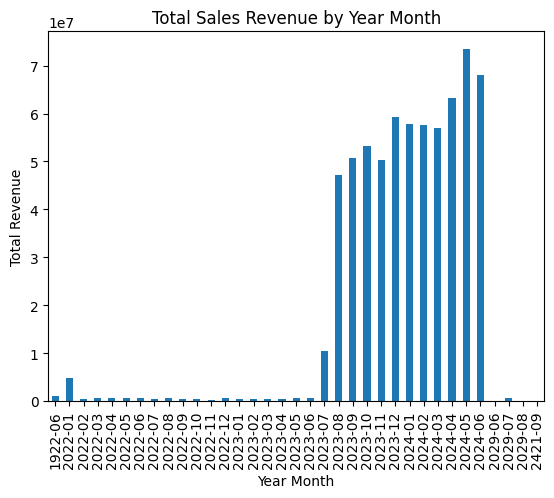

In [16]:
#chart 1
df.groupby('order_year_month')['total_amount'].sum().plot(kind='bar')
plt.title('Total Sales Revenue by Year Month')
plt.xlabel('Year Month')
plt.ylabel('Total Revenue')
plt.show()

<ipython-input-17-70b25cd9a37e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_type_total = df.groupby('order_type')['total_amount'].sum()


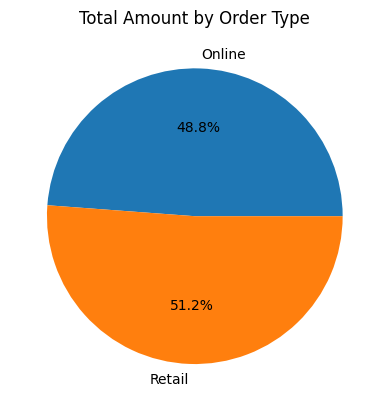

In [17]:
#chart 2
order_type_total = df.groupby('order_type')['total_amount'].sum()

plt.pie(order_type_total, labels=order_type_total.index, autopct='%1.1f%%')
plt.title('Total Amount by Order Type')
plt.show()

<ipython-input-18-851e5cfb11b6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('product_line')['total_amount'].sum().plot(kind='bar')


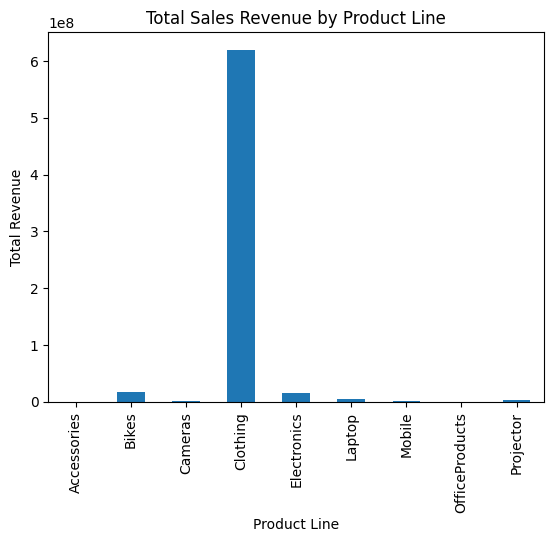

<ipython-input-18-851e5cfb11b6>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new.groupby('product_line')['total_amount'].sum().plot(kind='bar')


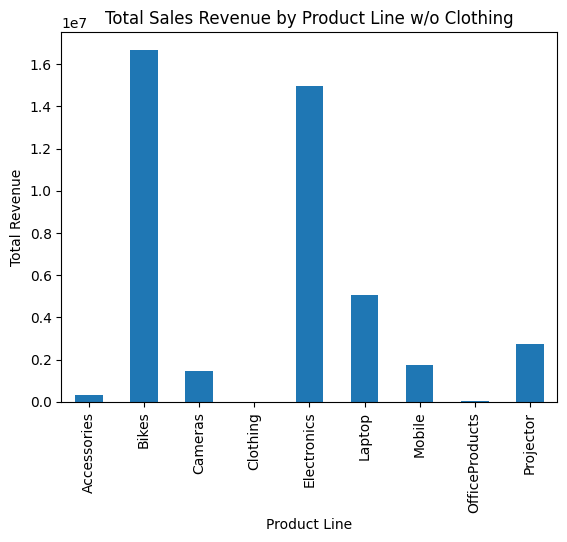

In [18]:
#chart 3
df.groupby('product_line')['total_amount'].sum().plot(kind='bar')
plt.title('Total Sales Revenue by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.show()

df_new = df.drop(df[df['product_line'] == 'Clothing'].index)
df_new.groupby('product_line')['total_amount'].sum().plot(kind='bar')
plt.title('Total Sales Revenue by Product Line w/o Clothing')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.show()